## PriceVoyager: Your Ticket to Savings
### Best Fare Forward: Your Personal Flight Savings Expert


**Aim:** To develop a predictive model capable of accurately estimating flight prices based on various factors, enabling users to make informed decisions and potentially save money on air travel. 

**Objective:** To build a machine learning model that effectively analyzes historical flight data to identify patterns and trends, ultimately predicting flight prices with a high degree of accuracy.
 
**Scope:** The project will focus on building a model using Python-based libraries, with an emphasis on data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluation. 


................................................................................<br>
................................................................................




### Data Import and Initial Exploration
* **Import necessary libraries:** Pandas, NumPy, Matplotlib, Seaborn
* **Read dataset:** Load the flight data from an Excel file into a Pandas DataFrame.
* **Exploratory Data Analysis (EDA):**
  * Display the first few rows (`.head()`) and last few rows (`.tail()`) of the DataFrame.
  * Get information about the dataset (`.info()`).
  * Check for missing values (`.isnull().sum()`).
  * Display descriptive statistics (`.describe()`).

### Data Cleaning and Preprocessing
* **Handle missing values:** Decide on a strategy (e.g., imputation, removal) to address missing values.
* **Data type conversions:** Convert relevant columns to appropriate data types (e.g., `datetime` for date columns).
* **Feature engineering:** Create new features from existing ones (e.g., derive day, month, year from `Date_of_Journey`).

### Exploratory Data Analysis (EDA)
* **Visualize data distribution:** Use histograms, box plots, and scatter plots to understand data characteristics.
* **Analyze relationships:** Explore relationships between features and the target variable (flight price) using scatter plots and correlation matrices.
* **Identify outliers:** Detect outliers using statistical methods or visual inspection.

### Feature Engineering and Selection
* **Create new features:** Derive additional features that might improve model performance (e.g., duration of flight, departure time, arrival time).
* **Handle categorical features:** Convert categorical features into numerical representations (e.g., one-hot encoding, label encoding).
* **Feature selection:** Choose the most relevant features for the model using techniques like correlation analysis or feature importance.

### Model Building and Evaluation
* **Split data:** Divide the dataset into training and testing sets.
* **Model selection:** Choose a suitable machine learning algorithm (e.g., Random Forest, Linear Regression).
* **Model training:** Train the model on the training data.
* **Model evaluation:** Evaluate the model's performance using metrics like R-squared, Mean Squared Error, Mean Absolute Error.
* **Hyperparameter tuning:** Optimize model performance by tuning hyperparameters (e.g., using Grid Search or Randomized Search).

### Model Deployment and Refinement
* **Model deployment:** Save the trained model for future use (e.g., using pickle).
* **Model monitoring:** Track model performance over time and retrain as needed.
* **Model explainability:** Understand the factors influencing the model's predictions (e.g., feature importance).

 



In [2]:
# ## 1. Import Necessary Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# ## 2. Read Data

train_data = pd.read_excel("Data_Train.xlsx")

# Display the first few rows of the dataset
print(train_data.head())

# Display the last few rows of the dataset
print(train_data.tail())

# Display information about the dataset
train_data.info()

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
           Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Ko

In [41]:
train_data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [4]:
# ## 3. Check for Missing Values

# Check for missing values in the dataset
print(train_data.isnull().sum())

# Display rows with missing values
print(train_data[train_data['Total_Stops'].isnull()])

# Drop rows with missing values
train_data.dropna(inplace=True)

# Verify that there are no more missing values
print(train_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [5]:
# ## 4. Data Preprocessing

# Create a copy of the dataset for preprocessing
data = train_data.copy()

# Convert specific columns to datetime format
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

# Extract day, month, and year from Date_of_Journey
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

# Extract hour and minute from Dep_Time and Arrival_Time
def extract_hour_min(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df

data = extract_hour_min(data, "Dep_Time")
data = extract_hour_min(data, "Arrival_Time")

# Drop the original datetime columns
data.drop(['Arrival_Time', 'Dep_Time'], axis=1, inplace=True)

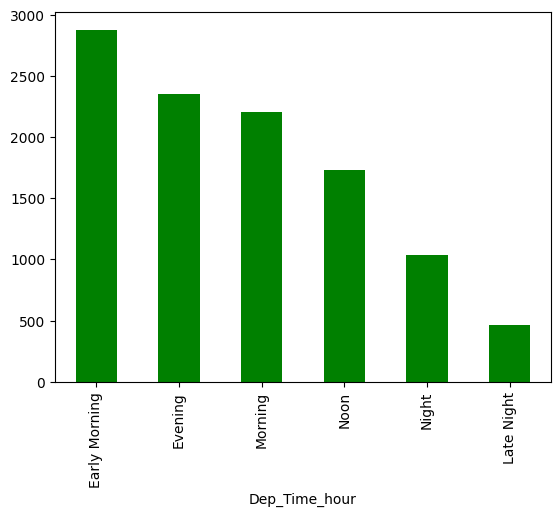

In [6]:
# ## 5. Feature Engineering

# Function to categorize departure time
def flight_dep_time(x):
    if (x > 4) and (x <= 8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <= 16):
        return "Noon"
    elif (x > 16) and (x <= 20):
        return "Evening"
    elif (x > 20) and (x <= 24):
        return "Night"
    else:
        return "Late Night"

# Apply the function to the departure time hour column
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="g")
plt.show()

# Convert duration to a consistent format
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' + x
    elif 'm' not in x:
        x = x + ' 0m'
    return x

data['Duration'] = data['Duration'].apply(preprocess_duration)

# Extract hours and minutes from Duration
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][:-1]))


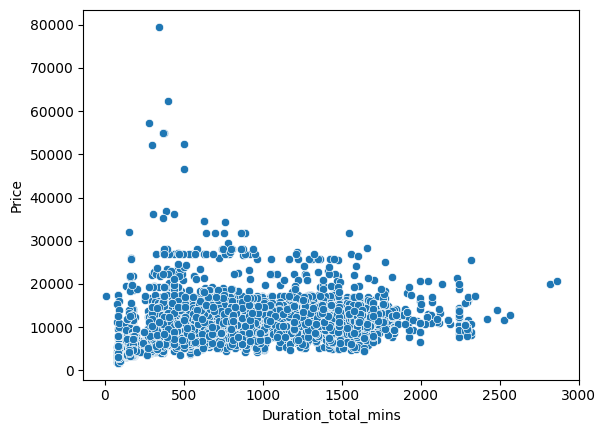

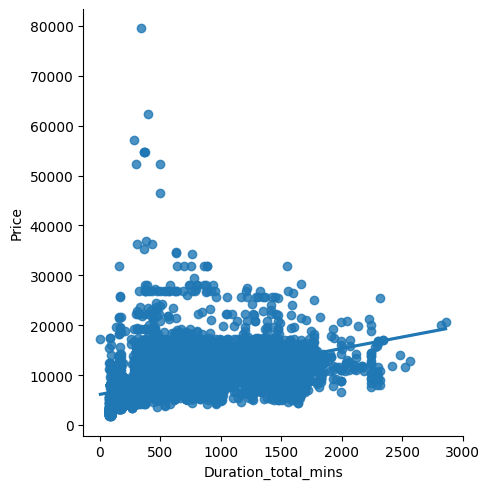

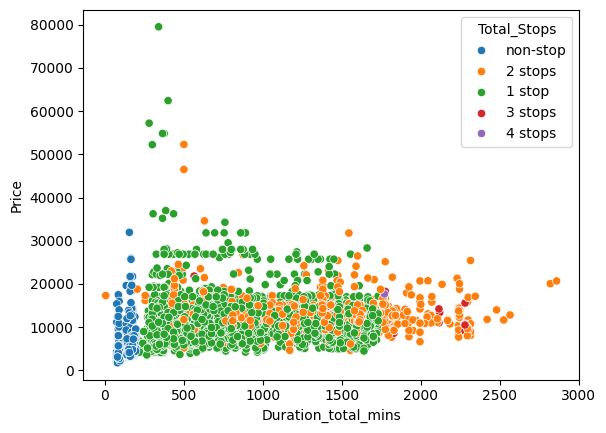

In [7]:
# ## 6. Analyze the Impact of Duration on Price

# Convert duration to total minutes
data['Duration_total_mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

# Plot the relationship between duration and price
sns.scatterplot(x="Duration_total_mins", y="Price", data=data)
plt.show()

sns.lmplot(x="Duration_total_mins", y="Price", data=data)
plt.show()

sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)
plt.show()

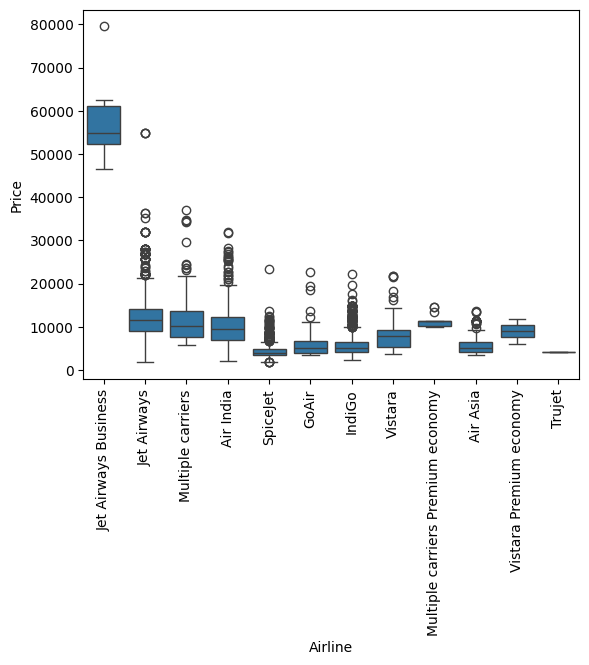

In [8]:
# ## 7. Airline vs Price Analysis

sns.boxplot(y='Price', x='Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation="vertical")
plt.show()

# ## 8. One-Hot Encoding for Categorical Features

# List of categorical and numerical columns
cat_col = [col for col in data.columns if data[col].dtype == "object"]
num_col = [col for col in data.columns if data[col].dtype != "object"]

# One-hot encoding for Source column
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] = data['Source'].apply(lambda x: 1 if x == sub_category else 0)

In [9]:
# ## 9. Target Guided Encoding for Other Categorical Features

# Airline encoding
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
dict_airlines = {key: index for index, key in enumerate(airlines, 0)}
data['Airline'] = data['Airline'].map(dict_airlines)

# Destination encoding
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dict_dest = {key: index for index, key in enumerate(dest, 0)}
data['Destination'] = data['Destination'].map(dict_dest)

# Total Stops encoding (ordinal)
stop = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}
data['Total_Stops'] = data['Total_Stops'].map(stop)

# Drop unnecessary columns
data.drop(columns=['Date_of_Journey', 'Additional_Info', 'Duration_total_mins', 'Source', 'Journey_year', 'Route', 'Duration'], axis=1, inplace=True)

In [48]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [10]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


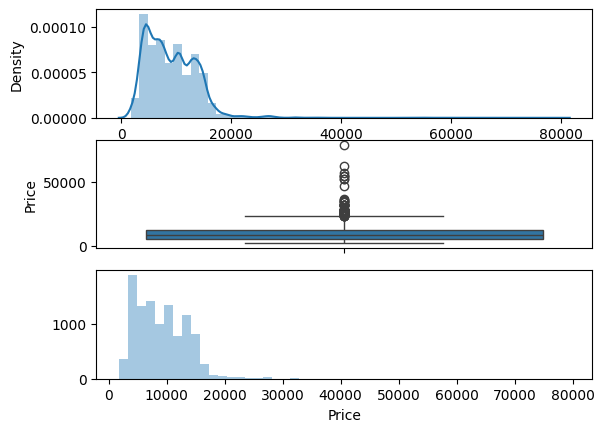

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
    
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

plot(data, 'Price')

In [12]:
#Using IQR to Identify Outliers:

q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1

maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

print("Maximum:", maximum)
print("Minimum:", minimum)

outliers = [price for price in data['Price'] if price > maximum or price < minimum]
print("Outliers:", outliers)
print("Number of Outliers:", len(outliers))


Maximum: 23017.0
Minimum: -5367.0
Outliers: [27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]
Number of Outliers: 94


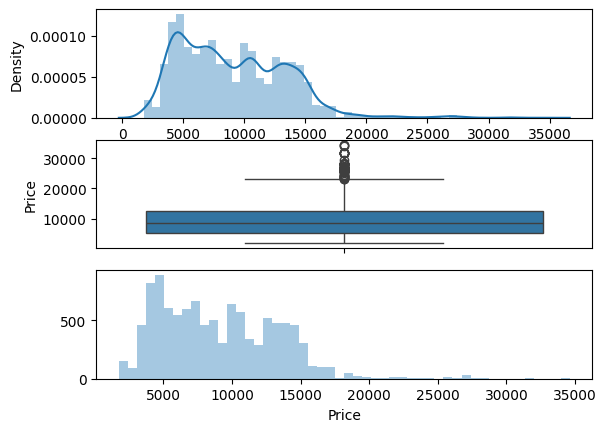

In [13]:
#Handling Outliers:
data['Price'] = np.where(data['Price'] >= 35000, data['Price'].median(), data['Price'])
plot(data, 'Price')


## Feature Selection<br>
Importance of Feature Selection:
To identify features that contribute significantly to the target variable and to avoid the curse of dimensionality.

In [14]:
#Mutual Information for Feature Selection:

X = data.drop(['Price'], axis=1)
y = data['Price']

from sklearn.feature_selection import mutual_info_regression

imp = mutual_info_regression(X, y)

imp_df = pd.DataFrame(imp, index=X.columns, columns=['importance'])
imp_df = imp_df.sort_values(by='importance', ascending=False)
print(imp_df)


                     importance
Airline                1.318636
Arrival_Time_hour      1.142374
Duration_hours         1.118946
Destination            1.068152
Dep_Time_hour          0.924315
Arrival_Time_minute    0.899172
Total_Stops            0.789984
Dep_Time_minute        0.757190
Duration_mins          0.679894
Journey_month          0.621664
Source_Delhi           0.523946
Source_Kolkata         0.457762
Source_Banglore        0.390683
Journey_day            0.373895
Source_Mumbai          0.195936
Source_Chennai         0.125917


## Building the ML Model
#### Splitting Dataset:

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [16]:
len(X.columns)

16

In [17]:
#Training a Random Forest Model:
from sklearn.ensemble import RandomForestRegressor

ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train)

y_pred = ml_model.predict(X_test)


In [18]:
#Evaluating the Model:
from sklearn import metrics

print("R2 Score:", metrics.r2_score(y_test, y_pred))


R2 Score: 0.8113460847482246


In [19]:
#Saving the Model
import pickle

# Save the model
with open('rf_random.pkl', 'wb') as file:
    pickle.dump(ml_model, file)

# Load the model
with open('rf_random.pkl', 'rb') as model_file:
    forest = pickle.load(model_file)

# Predict using the loaded model
y_pred2 = forest.predict(X_test)
print("R2 Score of loaded model:", metrics.r2_score(y_test, y_pred2))


R2 Score of loaded model: 0.8113460847482246


## Automated ML Pipeline
#### Custom Evaluation Metric:

In [20]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE:", mape(y_test, y_pred))


MAPE: 13.136847688494186


### Automating the Pipeline:

Training score: 0.9517280675370713
R2 score: 0.8100319565869754
MAE: 1178.6684682716718
MSE: 3698221.8183898167
RMSE: 1923.076134319652
MAPE: 13.213419369007553


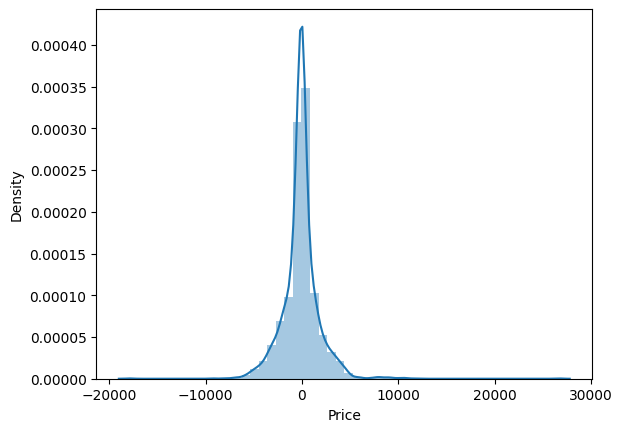

Training score: 0.966591628243878
R2 score: 0.6790173149406287
MAE: 1407.2937476600523
MSE: 6248762.412270685
RMSE: 2499.7524701999364
MAPE: 15.582228870581138


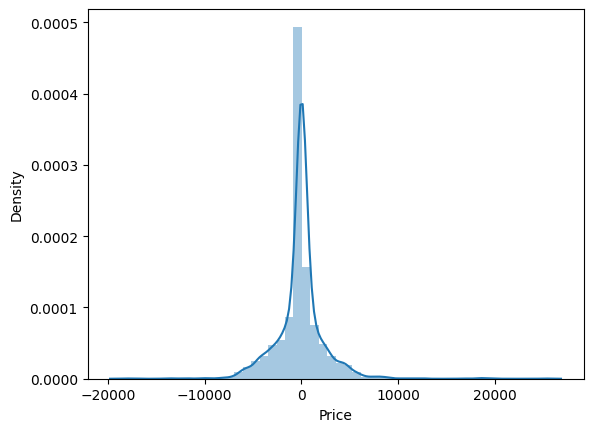

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    
    print('Training score:', model.score(X_train, y_train))
    print('R2 score:', metrics.r2_score(y_test, y_prediction))
    print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    print('MAPE:', mape(y_test, y_prediction))
    
    sns.distplot(y_test - y_prediction)
    plt.show()

predict(RandomForestRegressor())
predict(DecisionTreeRegressor())

### Hyperparameter Tuning
#### Randomized Search CV:

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter space
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=6)],
    'max_features': ["auto", "sqrt"],
    'max_depth': [int(x) for x in np.linspace(start=5, stop=30, num=4)],
    'min_samples_split': [5, 10, 15, 100]
}

# Random search
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)
rf_random.fit(X_train, y_train)

print("Best Params:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 21}
Best Score: 0.8039349509791905


In [23]:
len(X_test.columns)

16

In [24]:
# Load the model for prediction
def load_model(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Prediction function
def predict_price(features):
    model = load_model(model_file)
    return model.predict([features])


In [32]:
import pickle

# Load the model for prediction
def load_model(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Prediction function
def predict_price(features):
    model_file = 'rf_random.pkl'  # Ensure this path is correct
    model = load_model(model_file)
    return model.predict([features])

# Example usage with user input
feature_names = [
    'Airline', 'Destination', 'Total_Stops', 'Journey_day', 'Journey_month',
    'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
    'Duration_hours', 'Duration_mins', 'Source_Banglore', 'Source_Kolkata',
    'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'
]

example_features = []
for feature in feature_names:
    value = float(input(f"Enter the value for {feature}: "))
    example_features.append(value)

predicted_price = predict_price(example_features)
print("Selected Airline Predicted Price:", predicted_price)

Selected Airline Predicted Price: [9234.82]


In [33]:
X_test.head()

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
6075,8,4,2,21,5,15,5,1,30,10,25,0,0,1,0,0
3544,4,4,1,3,6,10,35,19,35,9,0,0,0,1,0,0
9291,5,3,1,9,5,20,20,9,5,12,45,0,1,0,0,0
5032,3,0,0,24,5,14,45,17,5,2,20,0,0,0,1,0
2483,10,4,1,21,5,22,50,4,25,5,35,0,0,1,0,0


In [34]:
y_test.head()

6075    16655.0
3544     4959.0
9291     9187.0
5032     3858.0
2483    12898.0
Name: Price, dtype: float64